# Estudos Locais - Distribuition Selector

In [6]:
'''
DOWNLOAD DADOS
'''

import sys
import os

# Caminho absoluto até a pasta "src"
sys.path.append(r"C:\Projetos\SistemaHidrologico\src")

# Agora o import funciona corretamente
from banco_dados_hidrologicos.sistema_hidrologico.ANA.ANA_Swagger_Processamento import *

Processer = Processamento_JSON()
df = Processer.P_HidroSerieVazao(
    pasta_json=r"C:\Projetos\SistemaHidrologico\src\hidrologia_estatistica\sistema_hidrologico\Arquivos Apresentacao\Bruto",
    pasta_saida_csv=r"C:\Projetos\SistemaHidrologico\src\hidrologia_estatistica\sistema_hidrologico\Arquivos Apresentacao\Processado"
)

# Supondo que seu DataFrame se chama df
# Ordenamos pelo nível de consistência (maior primeiro) e depois removemos duplicatas de datas
df = df.sort_values('Nivel_Consistencia', ascending=False)\
       .drop_duplicates(subset='Data', keep='first')\
       .sort_values('Data', ascending=True)\
       .reset_index(drop=True)

# Mantém apenas as duas primeiras colunas: Data e Valores
df = df.iloc[:, :2]



📂 Processando Vazao_estacao_40800001.json...
✅ CSV salvo em C:\Projetos\SistemaHidrologico\src\hidrologia_estatistica\sistema_hidrologico\Arquivos Apresentacao\Processado\Vazao_estacao_40800001.csv


In [7]:
'''
Selecionando os máximos anuais (no exemplo, vazão)
'''

df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)
annual_maxima = df[df.columns[0]].resample('A').max()


C:\Users\ecaputo\AppData\Local\Temp\ipykernel_3412\3126635121.py:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_maxima = df[df.columns[0]].resample('A').max()


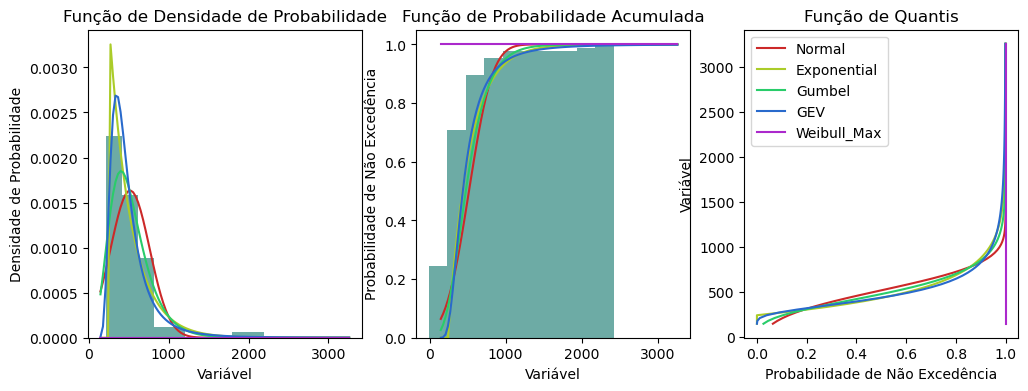

[[517.2445244186047, 244.1704081991297, 0], [241.72772258549935, 275.5168018331053, 0], [402.52674266757134, 198.74336184310417, 0], [381.2864718986408, 141.18822896153182, -0.2841135061691293], [0, 0, 0]]


TypeError: _parse_args() missing 1 required positional argument: 'c'

In [ ]:
'''
SELECIONANDO DISTRIBUIÇÃO
'''

import sys
import os

# Caminho até a pasta "src"
sys.path.append(r"C:\Projetos\SistemaHidrologico\src")

# Agora podemos importar de forma absoluta
from hidrologia_estatistica.sistema_hidrologico.MetodosEstatisticos import *

# Declarar e inserir distribuições no seletor
distribuitionSelector = DistribuitionSelector()
distribuitionSelector.appendDistribuition(Normal())
distribuitionSelector.appendDistribuition(Exponential())
distribuitionSelector.appendDistribuition(Gumbel())
distribuitionSelector.appendDistribuition(GEV())
#distribuitionSelector.appendDistribuition(Weibull_Max()) # AJUSTAR MAPA DE PARÂMETROS DA WEIBULL

# Ajustar as distribuições
distribuitionSelector.fit(annual_maxima.values, method='mml')

# Mostrar resultados de ajuste
distribuitionSelector.describePlot()
print(distribuitionSelector.getParams())
print(distribuitionSelector.fitTest())